# About Dataset
**1. Context**

- This dataset has 15,150 images from 12 different classes of household garbage; paper, cardboard, biological, metal, plastic, green-glass, brown-glass, white-glass, clothes, shoes, batteries, and trash.

- Garbage Recycling is a key aspect of preserving our environment. To make the recycling process possible/easier, the garbage must be sorted to groups that have similar recycling process. I found that most available data sets classify garbage into a few classes (2 to 6 classes at most). Having the ability to sort the household garbage into more classes can result in dramatically increasing the percentage of the recycled garbage.

**2. Content**

  - An ideal setting for data collection would be to place a camera above a conveyor where the garbage comes one by one, so that the camera can capture real garbage images. But since such a setup is not feasible at the moment I collected most of the images in this dataset by web scraping, I tried to get images close to garbage images whenever possible, for example in biological garbage category I searched for rotten vegetables, rotten fruits and food remains, etc. However, for some classes such as clothes or shoes it was more difficult to get images of clothes or shoes from the garbage, so mostly it was images of normal clothes. Nevertheless, being able to classify the images of this data set to 12 classes can be a big step towards improving the recycling process.

**3. Acknowledgements**
- The clothes category and 22 % of the shoes' category were obtained from the Clothing dataset https://www.kaggle.com/agrigorev/clothing-dataset-full
- Around 29% of the other 9 classes combined was collected from the Garbage Classification dataset https://www.kaggle.com/asdasdasasdas/garbage-classification
- All the rest of the images were obtained using Web Scrapping.
All the images collected using web scrapping are owned by their original photographers/owners. The images are only used to promote research and is not used to generate any profit. Any of the images in the data set can be deleted upon the request of the original photographer/owner.


**Why separate green, brown, white glass?**

The separation of **green, brown, and white/clear glass** in a garbage classification dataset is driven by the **practical demands of the recycling process.**

Glass colors must be separated because:

1. Compositional Differences Affect Purity
* **White/Clear Glass:** This is the purest form and holds the **highest recycling value** because it can be remelted and converted back into any color, including new clear glass.
* **Colored Glass (Green & Brown):** These colors are created by adding **metal oxides** (like iron oxide). If even a small amount of colored glass contaminates a batch of clear glass, the entire batch becomes unusable for making new clear products.
* In recycling, colored glass can generally only be recycled back into its matching color (e.g., green into green).

2. Optimizing Recycling Efficiency
Separating glass by color at the source (i.e., in the dataset) helps recycling facilities:
* **Preserve Value:** It maintains the purity of the valuable clear glass streams.
* **Reduce Cost:** It avoids the complex, energy-intensive, and costly process of sorting mixed-color glass at the plant.

3. Dataset Relevance
The goal of a garbage classification dataset is to **model real-world waste management**. By classifying glass by color, the AI model learns to:
* Identify materials precisely as required by the recycling industry.
* Support smart sorting systems (robots or smart bins) that must direct each color to the correct processing stream.



# Import libraries

In [ ]:
import os
import re
import time
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import zipfile
import sys

# TensorFlow / Keras (use tensorflow.keras consistently)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

print('setup successful!')

setup successful!


# Load data

In [ ]:
!pip install kaggle --quiet

In [ ]:
from google.colab import files
files.upload()  # chọn file kaggle.json đã tải về

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hoaian12042004","key":"06b7dd3b88ecefcf29ae17857aaeb8d4"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mostafaabla/garbage-classification

Dataset URL: https://www.kaggle.com/datasets/mostafaabla/garbage-classification
License(s): ODbL-1.0
 52% 125M/239M [00:00<00:00, 1.30GB/s]
100% 239M/239M [00:00<00:00, 664MB/s] 


In [ ]:
!unzip garbage-classification.zip -d garbage_data

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: garbage_data/garbage_classification/paper/paper381.jpg  
  inflating: garbage_data/garbage_classification/paper/paper382.jpg  
  inflating: garbage_data/garbage_classification/paper/paper383.jpg  
  inflating: garbage_data/garbage_classification/paper/paper384.jpg  
  inflating: garbage_data/garbage_classification/paper/paper385.jpg  
  inflating: garbage_data/garbage_classification/paper/paper386.jpg  
  inflating: garbage_data/garbage_classification/paper/paper387.jpg  
  inflating: garbage_data/garbage_classification/paper/paper388.jpg  
  inflating: garbage_data/garbage_classification/paper/paper389.jpg  
  inflating: garbage_data/garbage_classification/paper/paper39.jpg  
  inflating: garbage_data/garbage_classification/paper/paper390.jpg  
  inflating: garbage_data/garbage_classification/paper/paper391.jpg  
  inflating: garbage_data/garbage_classification/paper/paper392.jpg  
  inflating: garbage_data/garbage_

# Data understanding

In [ ]:
# Path where our data is located
base_path = "/content/garbage_data/garbage_classification"

In [ ]:
categories = {0: 'paper', 1: 'cardboard', 2: 'plastic', 3: 'metal', 4: 'trash', 5: 'battery',
              6: 'shoes', 7: 'clothes', 8: 'green-glass', 9: 'brown-glass', 10: 'white-glass',
              11: 'biological'}

In [ ]:
# Add class name prefix to filename. So for example "/paper104.jpg" become "paper/paper104.jpg"
def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: x[:re.search("\d",x).start()] + '/' + x)
    return df

# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + '/' + categories[category])

    filenames_list = filenames_list  +filenames
    categories_list = categories_list + [category] * len(filenames)

df = pd.DataFrame({
    'filename': filenames_list,
    'category': categories_list
})

df = add_class_name_prefix(df, 'filename')

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

print('number of elements = ' , len(df))A

number of elements =  15515


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-947048999.py:3: SyntaxWarning: invalid escape sequence '\d'
  df[col_name] = df[col_name].apply(lambda x: x[:re.search("\d",x).start()] + '/' + x)


In [ ]:
#Change the categories from numbers to names
df["category"] = df["category"].replace(categories)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.head()

,filename,category
0,plastic/plastic164.jpg,plastic
1,clothes/clothes1669.jpg,clothes
2,shoes/shoes212.jpg,shoes
3,brown-glass/brown-glass203.jpg,brown-glass
4,clothes/clothes4397.jpg,clothes


## Some images

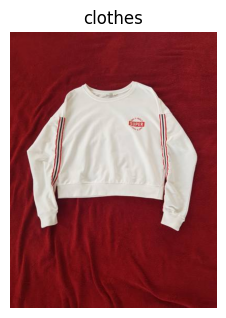

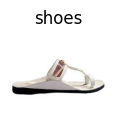

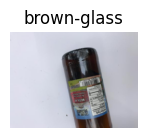

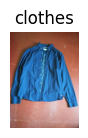

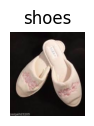

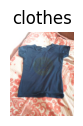

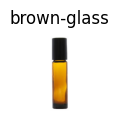

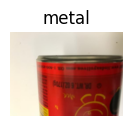

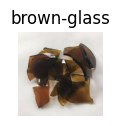

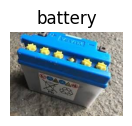

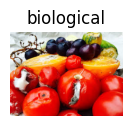

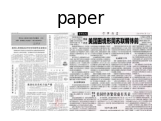

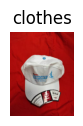

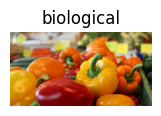

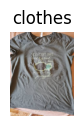

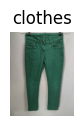

In [ ]:
# show some image in dataframe
plt.figure(figsize=(12, 12))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    img = Image.open(base_path + '/' + df['filename'][i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(df['category'][i])
    plt.tight_layout()
    plt.show()

=> Images in the dataset have a lot of sizes

## Check sizes of images

In [ ]:
df_size=df.copy()

(299, 168)


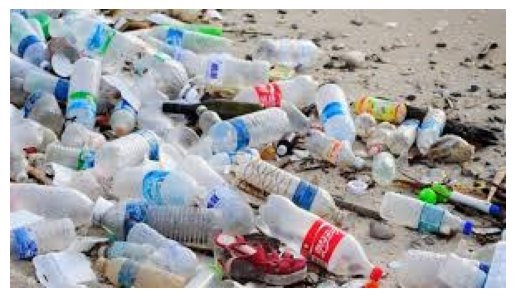

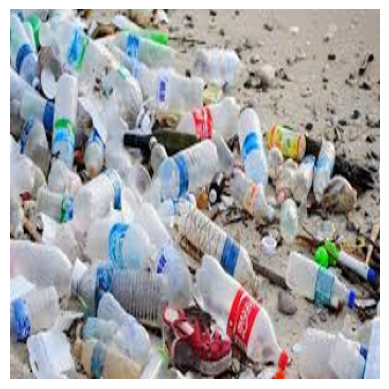

In [ ]:
# image 1
img = Image.open(base_path + '/' + df_size['filename'][0])
print(img.size)
# print image 1
plt.imshow(img)
plt.axis('off')
plt.show()

# resize 320x320 image 1 and print
img = img.resize((320, 320))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# images size analysis, min, max, mean of height, width, ...
df_size['Width'] = df_size['filename'].apply(lambda x: Image.open(base_path + '/' + x).size[0])
df_size['Height'] = df_size['filename'].apply(lambda x: Image.open(base_path + '/' + x).size[1])
df_size.describe()


,Height,Width
count,15515.000000,15515.000000
mean,351.705833,349.822301
std,149.418487,117.548544
min,100.000000,51.000000
25%,224.000000,234.000000
50%,384.000000,400.000000
75%,533.000000,400.000000
max,936.000000,888.000000


In [ ]:
# 1. Find the total number of images
total_images = len(df_size)

# 2. Find the minimum, maximum, and average dimensions
min_width = df_size['Width'].min()
max_width = df_size['Width'].max()
min_height = df_size['Height'].min()
max_height = df_size['Height'].max()

avg_width = df_size['Width'].mean()
avg_height = df_size['Height'].mean()

# 3. Find the most frequent size (the modal size)
most_common_size = df_size.groupby(['Width', 'Height']).size().nlargest(1)

print("-" * 50)
print("--- Image Size Analysis ---")
print(f"Total Images Scanned: {total_images}")
print("-" * 50)

print("\n[Original Image Size Range (Min/Max)]")
print(f"Width Range: {min_width} to {max_width} pixels")
print(f"Height Range: {min_height} to {max_height} pixels")
print("-" * 50)

print("\n[Average Image Size]")
print(f"Average Width: {avg_width:.2f} pixels")
print(f"Average Height: {avg_height:.2f} pixels")

print("-" * 50)


--------------------------------------------------
--- Image Size Analysis ---
Total Images Scanned: 15515
--------------------------------------------------

[Original Image Size Range (Min/Max)]
Width Range: 51 to 888 pixels
Height Range: 100 to 936 pixels
--------------------------------------------------

[Average Image Size]
Average Width: 349.82 pixels
Average Height: 351.71 pixels
--------------------------------------------------


Information about the image with the smallest width:


,filename,category,Height,Width
571,trash/trash622.jpg,trash,400,51


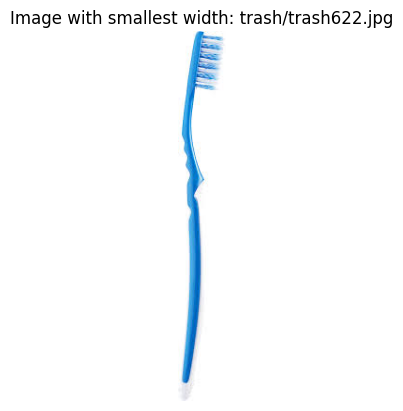

In [ ]:
# print image has smallest width

smallest_width_image_info = df_size[df_size['Width'] == df_size['Width'].min()]

print("Information about the image with the smallest width:")
display(smallest_width_image_info)

# Display the image
if not smallest_width_image_info.empty:
    image_filename = smallest_width_image_info.iloc[0]['filename']
    try:
        img = Image.open(base_path + '/' + image_filename)
        plt.imshow(img)
        plt.title(f"Image with smallest width: {image_filename}")
        plt.axis('off')
        plt.show()
    except FileNotFoundError:
        print(f"Error: Image file not found at {base_path + '/' + image_filename}")

Information about the image with the largest width:


,filename,category,Height,Width
6666,clothes/clothes4656.jpg,clothes,400,888
12911,clothes/clothes3193.jpg,clothes,400,888
14195,clothes/clothes1288.jpg,clothes,400,888


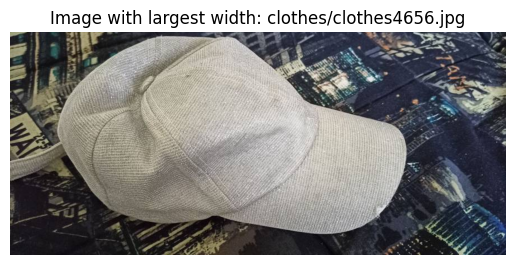

In [ ]:
# print image has largest width

largest_width_image_info = df_size[df_size['Width'] == df_size['Width'].max()]

print("Information about the image with the largest width:")
display(largest_width_image_info)

# Display the image
if not largest_width_image_info.empty:
    image_filename = largest_width_image_info.iloc[0]['filename']
    try:
        img = Image.open(base_path + '/' + image_filename)
        plt.imshow(img)
        plt.title(f"Image with largest width: {image_filename}")
        plt.axis('off')
        plt.show()
    except FileNotFoundError:
        print(f"Error: Image file not found at {base_path + '/' + image_filename}")

Information about the image with the smallest height:


,filename,category,Height,Width
15192,paper/paper237.jpg,paper,100,502


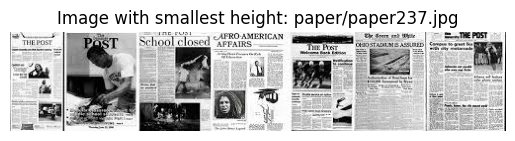

In [ ]:
# print image has smallest height

smallest_height_image_info = df_size[df_size['Height'] == df_size['Height'].min()]

print("Information about the image with the smallest height:")
display(smallest_height_image_info)

# Display the image
if not smallest_height_image_info.empty:
    image_filename = smallest_height_image_info.iloc[0]['filename']
    try:
        img = Image.open(base_path + '/' + image_filename)
        plt.imshow(img)
        plt.title(f"Image with smallest height: {image_filename}")
        plt.axis('off')
        plt.show()
    except FileNotFoundError:
        print(f"Error: Image file not found at {base_path + '/' + image_filename}")

Information about the image with the largest height:


,filename,category,Height,Width
3861,clothes/clothes4879.jpg,clothes,936,400


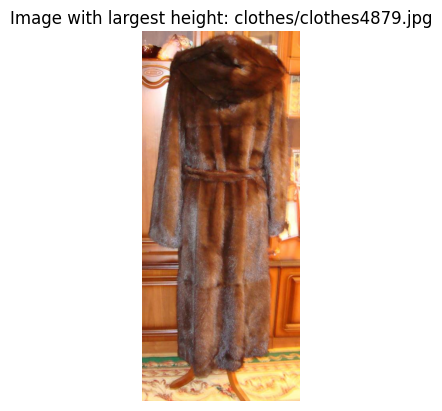

In [ ]:
# print image has largest height

largest_height_image_info = df_size[df_size['Height'] == df_size['Height'].max()]

print("Information about the image with the largest height:")
display(largest_height_image_info)

# Display the image
if not largest_height_image_info.empty:
    image_filename = largest_height_image_info.iloc[0]['filename']
    try:
        img = Image.open(base_path + '/' + image_filename)
        plt.imshow(img)
        plt.title(f"Image with largest height: {image_filename}")
        plt.axis('off')
        plt.show()
    except FileNotFoundError:
        print(f"Error: Image file not found at {base_path + '/' + image_filename}")

## Visualize image each category

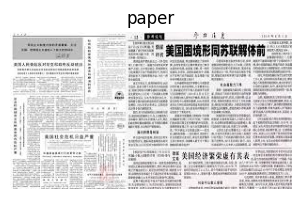

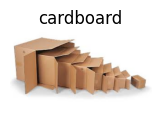

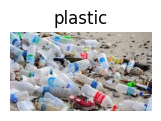

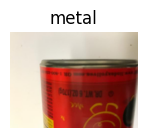

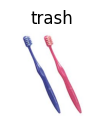

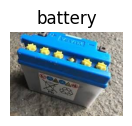

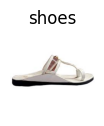

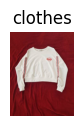

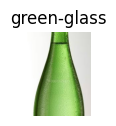

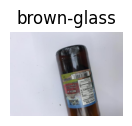

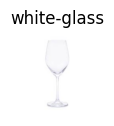

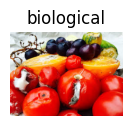

In [ ]:
# visualize one image each category
plt.figure(figsize=(12, 12))
for i in range(1, 13):
    plt.subplot(4, 4, i)
    img = Image.open(base_path + '/' + df[df['category'] == categories[i-1]]['filename'].iloc[0])
    plt.imshow(img)
    plt.axis('off')
    plt.title(categories[i-1])
    plt.tight_layout()
    plt.show()

## Pixel

In [ ]:
# print number in each pixel base RGB of image 1
import numpy as np
from PIL import Image

# 1. Define the path to your image
# *** REPLACE 'path/to/your/image1.jpg' with the actual path to your image file ***
#IMAGE_PATH = 'base_path + '/' + df_size['filename'][0]'

try:
    # 2. Open the image
    img =  Image.open(base_path + '/' + df_size['filename'][0])

    # 3. Convert the image to a NumPy array (W x H x 3 matrix)
    # The '3' represents the R, G, B channels
    pixel_matrix = np.array(img)

    # --- Display Information ---
    print(f"Image loaded successfully from: ")
    print(f"Original Image Size (W x H): {img.width} x {img.height}")
    print(f"Matrix Shape (H x W x Channels): {pixel_matrix.shape}")
    print(f"Data Type (Dtype): {pixel_matrix.dtype}")
    print("\n" + "="*50)
    print("RGB PIXEL MATRIX SAMPLE (Top-Left 3x3 Pixels)")
    print("="*50)

    # 4. Print a small section (e.g., the top-left 3x3 pixels)
    # This keeps the output manageable, as a full image matrix would be massive.

    # pixel_matrix[y_axis, x_axis]
    sample_size = 3
    sample_matrix = pixel_matrix[:sample_size, :sample_size]

    for y in range(sample_size):
        row_output = []
        for x in range(sample_size):
            # Each element is an array of [R, G, B] values (0-255)
            r, g, b = sample_matrix[y, x]
            row_output.append(f"({r:03}, {g:03}, {b:03})")

        print(f"Row {y}: {' '.join(row_output)}")

    print("\n[Each (R, G, B) tuple represents a single pixel.]")

except FileNotFoundError:
    print(f"Error: The file was not found at {IMAGE_PATH}")
    print("Please check the IMAGE_PATH and ensure the file name is correct.")
except Exception as e:
    print(f"An error occurred: {e}")

Image loaded successfully from: 
Original Image Size (W x H): 299 x 168
Matrix Shape (H x W x Channels): (168, 299, 3)
Data Type (Dtype): uint8

RGB PIXEL MATRIX SAMPLE (Top-Left 3x3 Pixels)
Row 0: (151, 177, 202) (116, 143, 170) (153, 183, 211)
Row 1: (158, 182, 208) (133, 159, 184) (149, 179, 207)
Row 2: (167, 189, 213) (173, 197, 221) (192, 218, 245)

[Each (R, G, B) tuple represents a single pixel.]


## Visualize distribution

In [ ]:
df['category'].value_counts()

,count
category,
clothes,5325
shoes,1977
paper,1050
biological,985
battery,945
cardboard,891
plastic,865
white-glass,775
metal,769


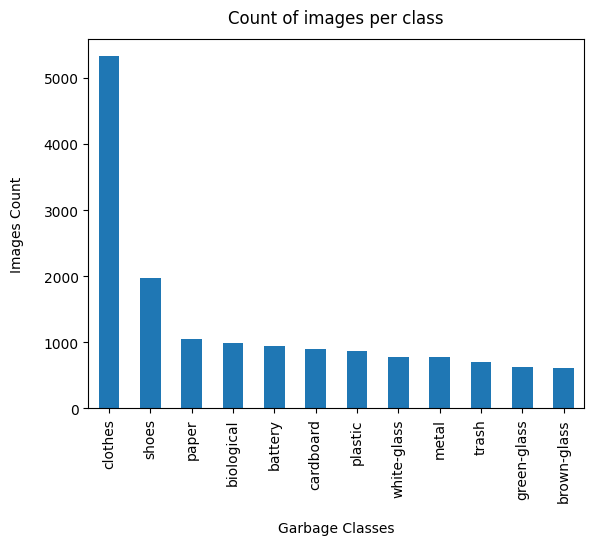

In [ ]:
df_visualization = df.copy()
# Change the catgegories from numbers to names
#df_visualization['category'] = df_visualization['category'].apply(lambda x:categories[x] )

df_visualization['category'].value_counts().plot.bar(x = 'count', y = 'category' )

plt.xlabel("Garbage Classes", labelpad=14)
plt.ylabel("Images Count", labelpad=14)
plt.title("Count of images per class", y=1.02);

- The bar chart illustrates the distribution of images across the 12 garbage classes in the dataset. It is clear that the dataset is highly imbalanced, with the clothes class dominating (over 5,000 images), followed by shoes (~2,000 images). All other classes—such as paper, biological, battery, and various types of glass—have fewer than 1,000 samples each.

- This imbalance could bias the model toward predicting majority classes like clothes and shoes, while underperforming on minority ones (e.g., green-glass, brown-glass).